# Predicting Diabetes

# import libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

## Load 

In [2]:
df = pd.read_csv("pima-data.csv")

In [3]:
df.shape

(768, 10)

### Removing non required colomns from dataset *null* , *nonused* , **specially Correlated**

In [4]:
df.isnull().values.any()                           #checking null values if found remoove them

False

In [5]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


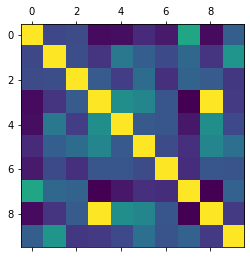

In [7]:
plt.matshow(df.corr())                         #plotting graph for correlated values
plt.show()

In [8]:
df.corr()                                       #correlation table

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [9]:
del df['skin']                     #remove correalted attribute

In [10]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


## Molding

### Changing Data types

In [11]:
diabetes_map={True : 1 , False : 0}

In [12]:
df.head(6)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
5,5,116,74,0,0,25.6,0.201,30,False


In [13]:
diabetes_map={True : 1 , False : 0}                       #mapping data to convert true in 1 and false in 0
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [14]:
df.head(6)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


### Checking T False ratio in result yielding attribute *diabetes* to check if dataset is *balanced*


In [15]:
ntrue= len(df.loc[df ['diabetes']==True])         #finding total true val in col diabetes and stores total found int val in ntrue
nfalse=len(df.loc[df ['diabetes']==False])

In [16]:
print("No of trues in  diabetes colomn {0} ({1:2.2f}%)".format(ntrue , (ntrue/(ntrue + nfalse))*100))      #printing total val of true by converting in form of %
print("No of False in  diabetes colomn {0} ({1:2.2f}%)".format(ntrue , (nfalse/(ntrue + nfalse))*100))

No of trues in  diabetes colomn 268 (34.90%)
No of False in  diabetes colomn 268 (65.10%)


## Select Algo to use using theory


## Training Model  Using Naive Bayes

### preparing data for training

### Splitting


In [17]:
from sklearn.model_selection import train_test_split       #library

feature_col=['num_preg','glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi','diab_pred']
predict_feature_col=['diabetes']

x=df[feature_col].values                                #retreiveig values of all colomn stored in feature_col using .val function and storing in x
y=df[predict_feature_col].values                        #retrieving all colomn val of col stored in predict feature and stores in y 
split_file_size=0.30


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=split_file_size,random_state=42)   #calling train split function and storing in x_train,x_test,y etc splits

#x_train means feature col train split
#x_test means feature col test split
#y_train means predict col train split
#y_test means predict col test split

### Checking if the split is done correct of feature values

In [18]:
print("{0:0.2f}% splitting in train set" .format((len(x_train)/ len(df.index))*100))
print("{0:0.2f}% splitting in train set" .format((len(x_test)/ len(df.index))*100))



69.92% splitting in train set
30.08% splitting in train set


### Checking if the split is done correct of predict values

In [19]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


### post split preperation

#### Checking for hidden Null,Incorrec and missing values

In [20]:
df.head(5)    #hidden Null and not correect values found as 0 in thickness(skin thickness cannot be 0) and other

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
print("Null values in feature num_preg :{0}".format(len(df.loc[df['num_preg']==0])))

print("Null values in feature glucose_conc : {0}".format(len(df.loc[df['glucose_conc']==0])))

print("Null values in feature diastolic_bp :{0}".format(len(df.loc[df['diastolic_bp']==0])))

print("Null values in feature thickness : {0}".format(len(df.loc[df['thickness']==0])))

print("Null values in feature insulin :{0}".format(len(df.loc[df['insulin']==0])))

print("Null values in feature bmi: {0}".format(len(df.loc[df['bmi']==0])))

print("Null values in feature diab_pred : {0}".format(len(df.loc[df['diab_pred']==0])))

print("Null values in feature age : {0}".format(len(df.loc[df['age']==0])))




#checking for null missing or incorrect values in all feature coloumns


Null values in feature num_preg :111
Null values in feature glucose_conc : 5
Null values in feature diastolic_bp :35
Null values in feature thickness : 227
Null values in feature insulin :374
Null values in feature bmi: 11
Null values in feature diab_pred : 0
Null values in feature age : 0


#### Imputing and replacing the null values

In [22]:
from sklearn.impute import SimpleImputer

imputedvalues=SimpleImputer(   missing_values=0,
    strategy='mean',
    fill_value=None,
    verbose=0)

x_train=imputedvalues.fit_transform(x_train)
x_test=imputedvalues.fit_transform(x_test)



### Now Training using Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

nb_model= GaussianNB()                       #storing model in vairable
nb_model.fit(x_train,y_train.ravel())         #fitting model (stored in nb_mode) to our train data x_train and y_train to train the model

#Model in now trained

GaussianNB()

## Testing Model 

### Evaluating perforamnce of the Model  (Accuracy,Confusion metric,Classification Report)

#### On train data

In [24]:
from sklearn import metrics

model_pred=nb_model.predict(x_train)               #predictions on x_train
print("Accuracy {0:4f}".format(metrics.accuracy_score(y_train,model_pred)))    #compraing pred with actual pred in y train and calculating accuracy 

#accuracy is 75%

Accuracy 0.757914


In [25]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_train,model_pred)))

print("Classification report")
print("{0}".format(metrics.classification_report(y_train,model_pred)))

Confusion Matrix
[[301  48]
 [ 82 106]]
Classification report
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       349
           1       0.69      0.56      0.62       188

    accuracy                           0.76       537
   macro avg       0.74      0.71      0.72       537
weighted avg       0.75      0.76      0.75       537



#### On test Data

In [26]:
model_pred=nb_model.predict(x_test)               #predictions on x_test
print("Accuracy {0:4f}".format(metrics.accuracy_score(y_test,model_pred)))    #compraing pred with actual pred in y test and calculating accuracy 

#accuracy is 76%

Accuracy 0.770563


In [27]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,model_pred)))

print("Classification report")
print("{0}".format(metrics.classification_report(y_test,model_pred)))    #Recall and precisoion in 1 is bad we have to improve it


Confusion Matrix
[[125  26]
 [ 27  53]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       151
           1       0.67      0.66      0.67        80

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



### Increasing Performance of MOdel (Recall value and precision value of +ve)


#### Trying Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train.ravel())


RandomForestClassifier()

In [29]:
model_predrandom=random.predict(x_test)               #predictions on x_test
print("Accuracy {0:4f}".format(metrics.accuracy_score(y_test,model_predrandom)))    #compraing pred with actual pred in y test and calculating accuracy 

#accuracy is 75% but is the recall and precisoin good enough?


Accuracy 0.740260


In [30]:
model_predrandom=random.predict(x_train)               #predictions on x_train
print("Accuracy {0:4f}".format(metrics.accuracy_score(y_train,model_predrandom)))    #compraing pred with actual pred in y train and calculating accuracy 

#accuracy is 75% but is the recall and precisoin good enough?


Accuracy 1.000000


In [31]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,model_pred)))

print("Classification report")
print("{0}".format(metrics.classification_report(y_test,model_pred)))

#As ACCURACY on Train is Perfect of 100% and test data is 75% ITS an example of OVERFITTING

Confusion Matrix
[[125  26]
 [ 27  53]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       151
           1       0.67      0.66      0.67        80

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



#### Solving OVERFITTING by changing HYPERparameters (regular,class_weight) ( not part:also changing to Logistic Regression)

In [32]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=0.1,random_state=42,max_iter=200)
log.fit(x_train,y_train.ravel())

LogisticRegression(C=0.1, max_iter=200, random_state=42)

In [33]:
model_predrandom=log.predict(x_test)               #predictions on x_test
print("Accuracy {0:4f}".format(metrics.accuracy_score(y_test,model_predrandom)))    #compraing pred with actual pred in y test and calculating accuracy 

#accuracy is 76% but is the recall and precisoin good enough?


Accuracy 0.753247


In [34]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test,model_predrandom)))

print("Classification report")
print("{0}".format(metrics.classification_report(y_test,model_predrandom)))

#Value of Recall is still very low so we have to find value of regular hyperparamter c for which it yelds best recall value

Confusion Matrix
[[126  25]
 [ 32  48]]
Classification report
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



##### Automating finding the value of C for which it yeilds the best result of Recall or precision (imp) (PART)

1st max value of 0.613 occured at C=1.700


Text(0, 0.5, 'recall score')

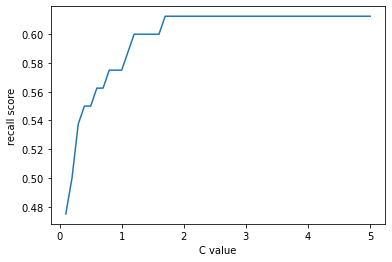

In [44]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []



C_val = C_start
best_recall_score = 0

#Using loop to find best value of c for which recall is the best (it can be small val of c but recall should be high)
while (C_val < C_end):
    C_values.append(C_val)
    # Training the model here checking best hyperparameter values  in incr to find best recall
    lr_model_loop = LogisticRegression(C=C_val, solver='liblinear', random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    #predicting
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    #recall score calculation
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    #storing in array
    recall_scores.append(recall_score)
    #if statement to check if the value of recall is greater than previous best
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

#plotting relation between c and recall value in graph using matplot lib
%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

#means the peak value of recall is 0.613 at c=1.700 when regular hyperparaemeter c is used


##### Chanigng hyperparameter Class_weight to further improve recall (u can experiment with different hyperparameters)

1st max value of 0.750 occured at C=0.400


Text(0, 0.5, 'recall score')

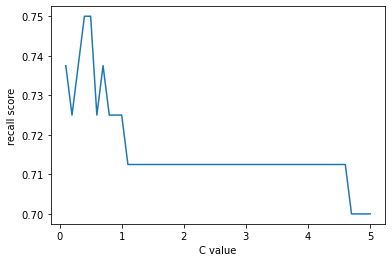

In [45]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []



C_val = C_start
best_recall_score = 0

#Using loop to find best value of c for which recall is the best (it can be small val of c but recall should be high)
while (C_val < C_end):
    C_values.append(C_val)
    # Training the model here checking best hyperparameter values  in incr to find best recall
    #class_weight parameter added here
    lr_model_loop = LogisticRegression(C=C_val, solver='liblinear',class_weight='balanced', random_state=42) 
    lr_model_loop.fit(x_train, y_train.ravel())
    #predicting
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    #recall score calculation
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    #storing in array
    recall_scores.append(recall_score)
    #if statement to check if the value of recall is greater than previous best
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

#plotting relation between c and recall value in graph using matplot lib
%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

#means the peak value of recall is 0.750 at c=0.400 when class_weight is altered


##### Training model with best C value hyperparameter and class weight finding ACcuracy and recall

In [50]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=C_val, solver='liblinear',class_weight='balanced', random_state=42)
log.fit(x_train,y_train.ravel())

model_predrandom=log.predict(x_test)               #predictions on x_test
print("Accuracy {0:4f}".format(metrics.accuracy_score(y_test,model_predrandom))) 

print("Classification report")
print("{0}".format(metrics.classification_report(y_test,model_predrandom)))



Accuracy 0.731602
Classification report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       151
           1       0.60      0.70      0.64        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.75      0.73      0.74       231



#### Solving Fine Tuning problems USING *CROSS VALIDATION*

In [58]:
#As we have fine tuned model on given test set (it will give good pred on given test set but might not perform good on new real data) , we first need to check and tune it on validation then test
#it on test data for this cross validation tech are used
# Using CROSS VAL our model might not perform good on our test data but it will perform much beteer on real runtime data

##### Using K FOLD validation model  of LOGISTIC REGRESSION 

In [54]:
from sklearn.linear_model import LogisticRegressionCV  #CV= CRoss validation
lr_cv=LogisticRegressionCV(Cs=3,
     cv=10,  solver='lbfgs',max_iter=100, class_weight='balanced', n_jobs=-1,refit=True,   random_state=None)
lr_cv.fit(x_train,y_train.ravel())


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1)

In [57]:
lr_cv_predict_test = lr_cv.predict(x_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7273
[[112  39]
 [ 24  56]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       151
           1       0.59      0.70      0.64        80

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231

